### Objetivos:
* ##### Encontrar agrupamentos (clusters) em dados não rotulados (ou que possuem rótulos, mas estes são ignorados)\\
* ##### Entender o algoritmo do K-Means como forma de encontrar tais agrupamentos

### Passos:
   1. ##### Selecionar o número de clusters (K) a serem identificados nos seus dados
   2. ##### Selecionar aleatoriamente K pontos iniciais, que são chamados centroides
   3. ##### Medir a distância de cada data point aos centroides
   4. ##### Atribuir cada data point ao cluster mais próximo
   5. ##### Calcular os novos centroides através da média de distâncias dos data points de cada cluster
   6. ##### Recalcular as distâncias de cada data point aos novos centroides
   7. ##### Repetir 4 e 5 até que o número máximo de iterações definidas ou até que não haja mudança nos clusters

### Conhecendo o Dataset

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.shape

(891, 12)

In [5]:
# Quantidade de pessoas dividas por sexo
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
total_homens = train_df['Sex'].value_counts()[0]
total_mulheres = train_df['Sex'].value_counts()[1]

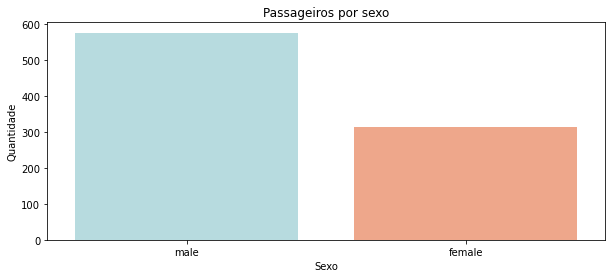

In [9]:
# Desses, quantos homens sobreviveram e quantas mulheres sobreviveram
plt.figure(figsize=(10, 4))
sns.countplot(x='Sex', data=train_df, palette=['powderblue', 'lightsalmon'])
plt.title('Passageiros por sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()

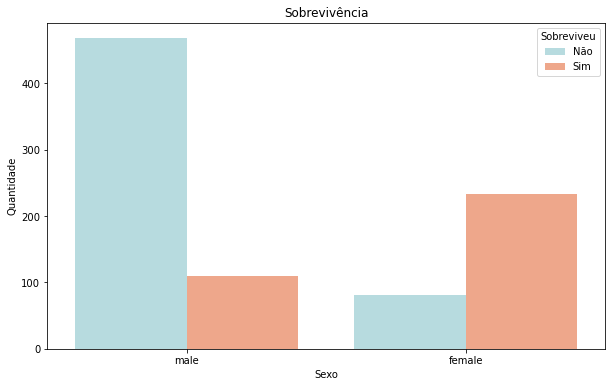

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=train_df, palette=['powderblue', 'lightsalmon'])
plt.title('Sobrevivência')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

In [10]:
homens_sobreviventes = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1)].shape[0]
homens_sobreviventes

109

In [11]:
mulheres_sobreviventes = train_df[(train_df['Sex'] == 'female') & (train_df['Survived'] == 1)].shape[0]
mulheres_sobreviventes

233

In [12]:
# Porcentagem de sobreviventes
total = total_homens + total_mulheres

# Quantas pessoas sobreviveram
sobreviventes = (((mulheres_sobreviventes + homens_sobreviventes)/total)*100)
print("{:.2f}%".format(sobreviventes))

38.38%


In [6]:
colunas = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

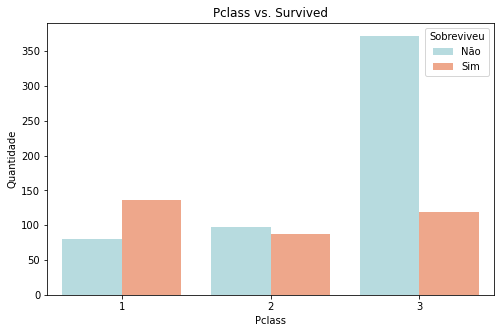

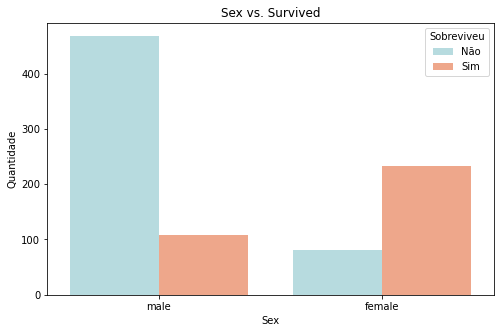

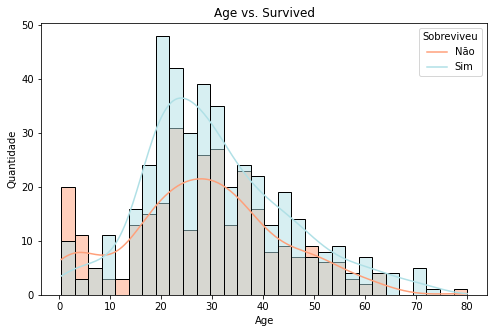

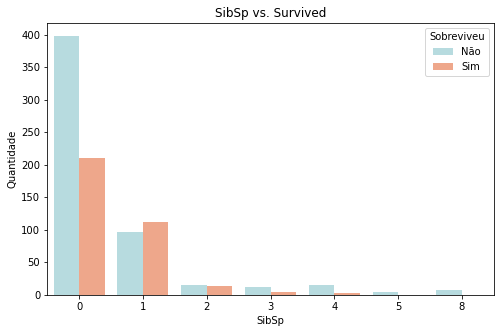

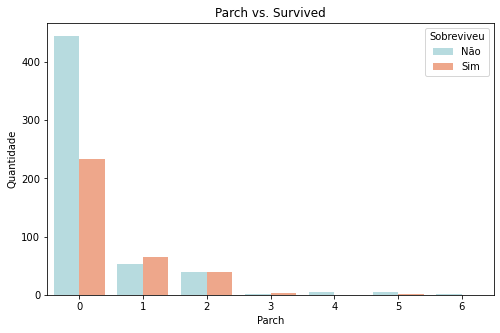

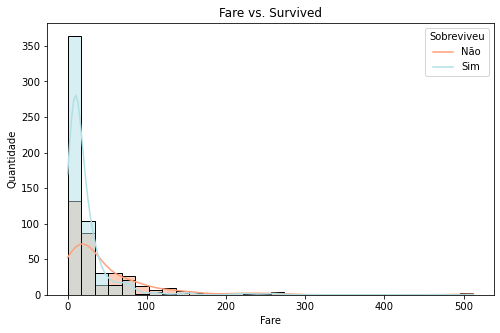

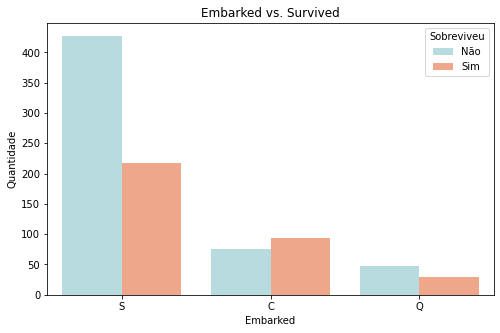

In [7]:
# Plotagem das features

for col in colunas:
    if(col=='Age' or col=='Fare'):
        plt.figure(figsize=(8, 5))
        sns.histplot(x=col, hue='Survived', data=train_df, palette=['powderblue', 'lightsalmon'], bins=30, kde=True)
        plt.title(f'{col} vs. Survived')
        plt.xlabel(col)
        plt.ylabel('Quantidade')
        plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
        plt.show()
    else:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, hue='Survived', data=train_df, palette=['powderblue', 'lightsalmon'])
        plt.title(f'{col} vs. Survived')
        plt.xlabel(col)
        plt.ylabel('Quantidade')
        plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
        plt.show()

### Pré-Processamento

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Selecionar as features
features_categoricas = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
features_numericas = ['Age', 'Fare']
# features numéricas - Age, Fare
# features categóricas - PClass, Sex, SibSp, Parch, Embarked

X = train_df.drop(['PassengerId', 'Cabin', 'Survived', 'Name', 'Ticket'], axis=1)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [12]:
# Lidar com valores faltantes
X['Age'] = X['Age'].fillna(X['Age'].mean())

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [14]:
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
X['Embarked'] = X['Embarked'].fillna('S')

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [17]:
# Encoding das features categóricas

le = LabelEncoder()
for feature in features_categoricas:
    X[feature] = le.fit_transform(X[feature])

In [18]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22.000000,1,0,7.2500,2
1,0,0,38.000000,1,0,71.2833,0
2,2,0,26.000000,0,0,7.9250,2
3,0,0,35.000000,1,0,53.1000,2
4,2,1,35.000000,0,0,8.0500,2
5,2,1,29.699118,0,0,8.4583,1
6,0,1,54.000000,0,0,51.8625,2
7,2,1,2.000000,3,1,21.0750,2
8,2,0,27.000000,0,2,11.1333,2
9,1,0,14.000000,1,0,30.0708,0


In [19]:
# Scaling
scale = StandardScaler()
X_scale = scale.fit_transform(X)


In [20]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22.000000,1,0,7.2500,2
1,0,0,38.000000,1,0,71.2833,0
2,2,0,26.000000,0,0,7.9250,2
3,0,0,35.000000,1,0,53.1000,2
4,2,1,35.000000,0,0,8.0500,2
5,2,1,29.699118,0,0,8.4583,1
6,0,1,54.000000,0,0,51.8625,2
7,2,1,2.000000,3,1,21.0750,2
8,2,0,27.000000,0,2,11.1333,2
9,1,0,14.000000,1,0,30.0708,0


In [21]:
# Usar o Kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scale)

KMeans(n_clusters=2, random_state=42)

In [22]:
train_df['KMeans'] = kmeans.labels_
train_df.groupby('KMeans')['Survived'].mean()

KMeans
0    0.617647
1    0.298622
Name: Survived, dtype: float64

In [23]:
type(kmeans.labels_)

numpy.ndarray

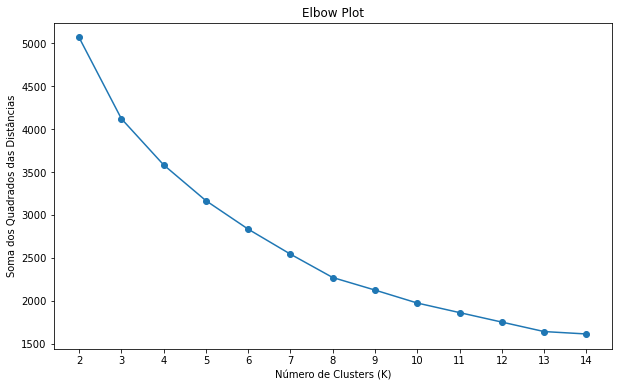

In [24]:
num_clusters = range(2, 15) 
soma_dist_quadradas = []

for cluster in num_clusters:
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(X_scale)
    soma_dist_quadradas.append(kmeans.inertia_)

# Plotar
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, soma_dist_quadradas, marker='o', linestyle='-')
plt.title('Elbow Plot')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.xticks(num_clusters)
plt.show()